In [19]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ERzgygJiShFSaTgQU-adBoJTEyGc16mxw39cAdvkbH5k',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'mydataproject1-donotdelete-pr-vdfaku1zfk9p4z'
object_key = 'LoanData.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head(10)

# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='439c00fb-b3e2-4fd2-960e-f9bdf67eeb07', project_access_token='p-2+Dzkl9RsfSP0p7ywkiqagfQ==;FQtoakrsjPT0UA6EizFwSA==:sdYJp29pW+8fDt5x1OTi27XYImGfqczSDTDPvW2EhWVETGhGDCV+dROFM/r3lqS2HKEeQs81+k6F2VDQZiKiiND4WQtCTH79iQ==')
pc = project.project_context

from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space({'token':'p-2+Dzkl9RsfSP0p7ywkiqagfQ==;FQtoakrsjPT0UA6EizFwSA==:sdYJp29pW+8fDt5x1OTi27XYImGfqczSDTDPvW2EhWVETGhGDCV+dROFM/r3lqS2HKEeQs81+k6F2VDQZiKiiND4WQtCTH79iQ=='})



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
data["Loan_ID"].nunique()

614

In [25]:
data=data.drop(columns=['Loan_ID'])

In [26]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [28]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [29]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [32]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [35]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [36]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [37]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [38]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [39]:
data["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [40]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [41]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [43]:
data['Credit_History']=data['Credit_History'].replace({1:"good",0:"bad"})

In [44]:
data['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [45]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [46]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [47]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [48]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [49]:
continous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_continous=["Depentents",'Loan_Amount_Term']

Exploratory Data Analysis(EDA)

In [50]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


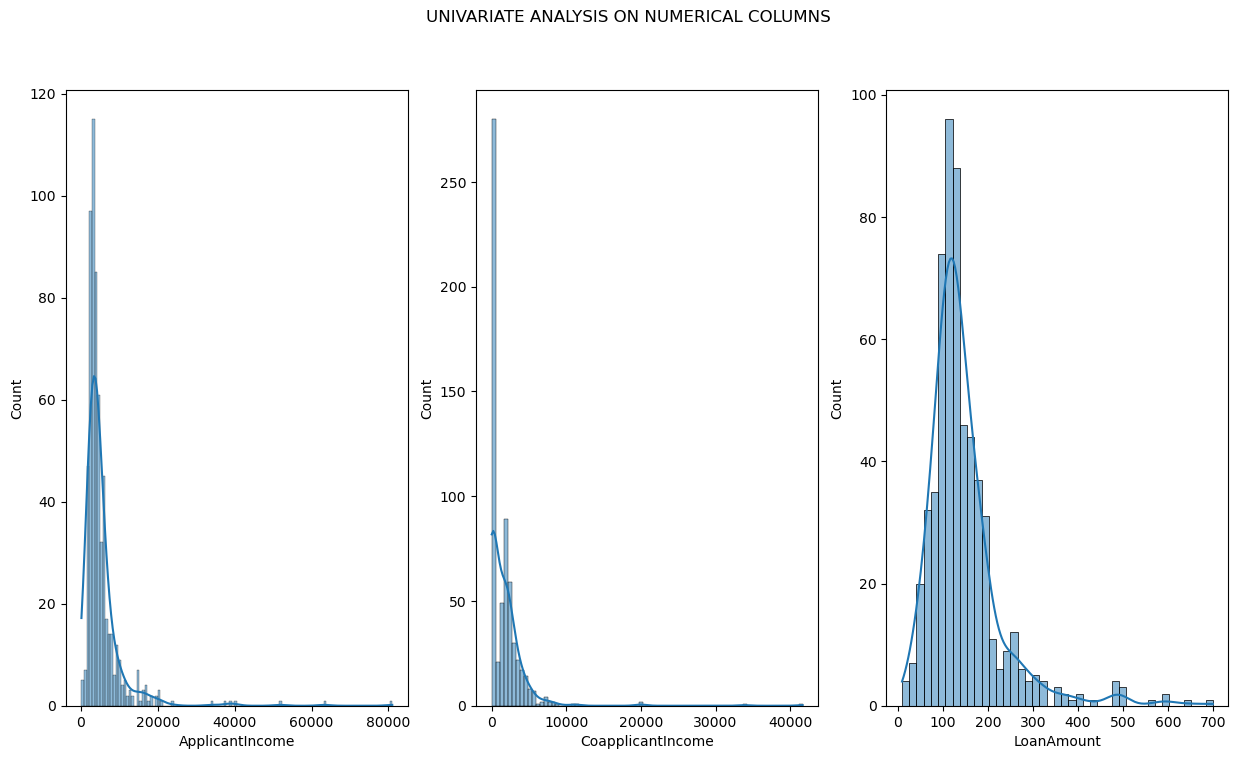

In [51]:
plt.rcParams['figure.figsize']=(15,8) #configuration setting controls the default size of the figures (plots)

plt.subplot(1,3,1)
sns.histplot(data["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS')
plt.show()

In [52]:
data[continous].skew()  #all 3 are in +ve skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

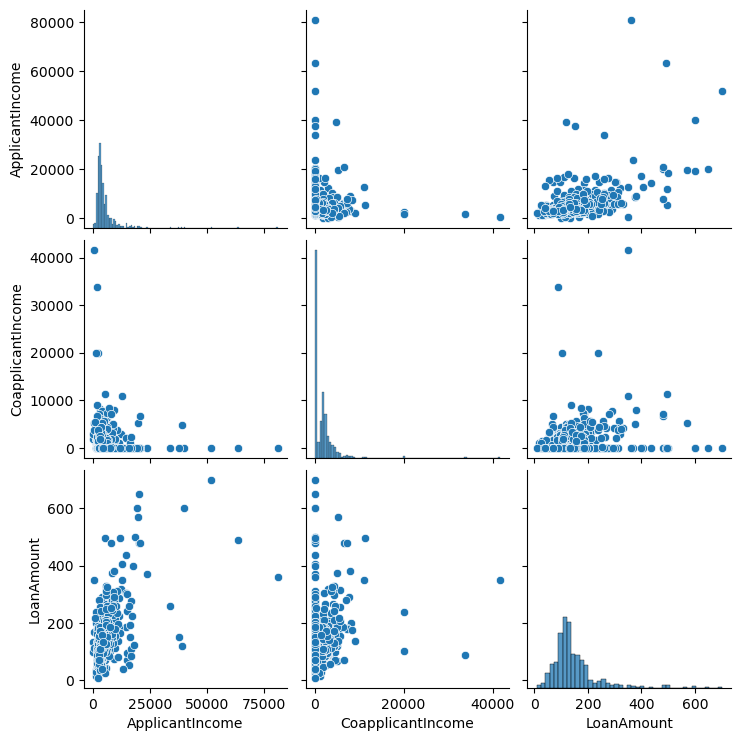

In [53]:
sns.pairplot(data[continous])
plt.show()

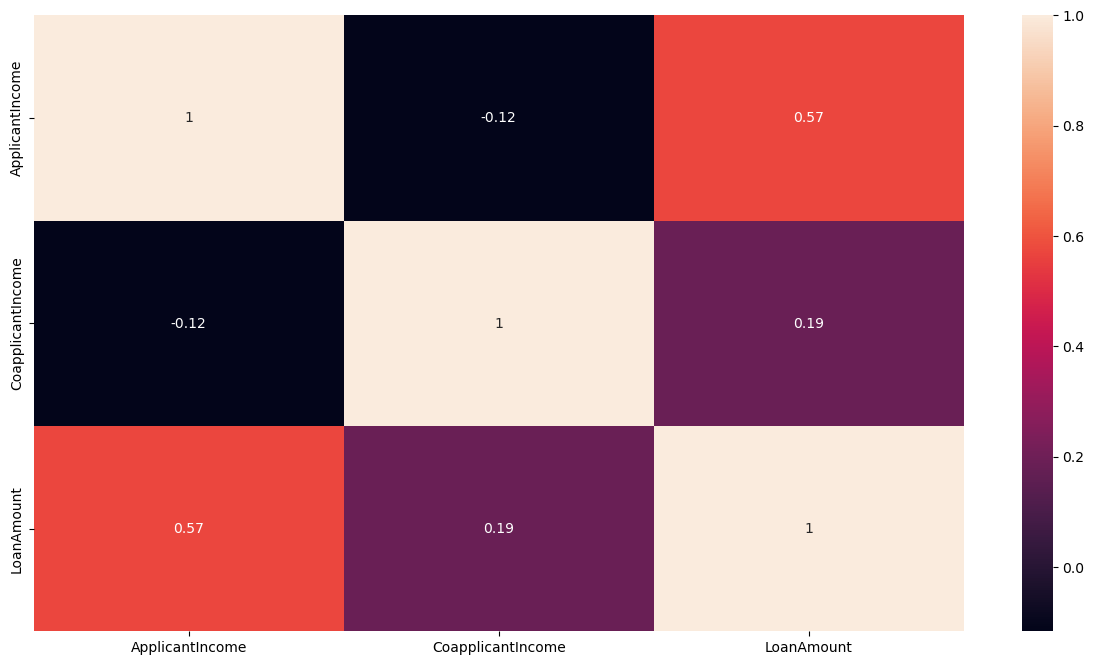

In [54]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

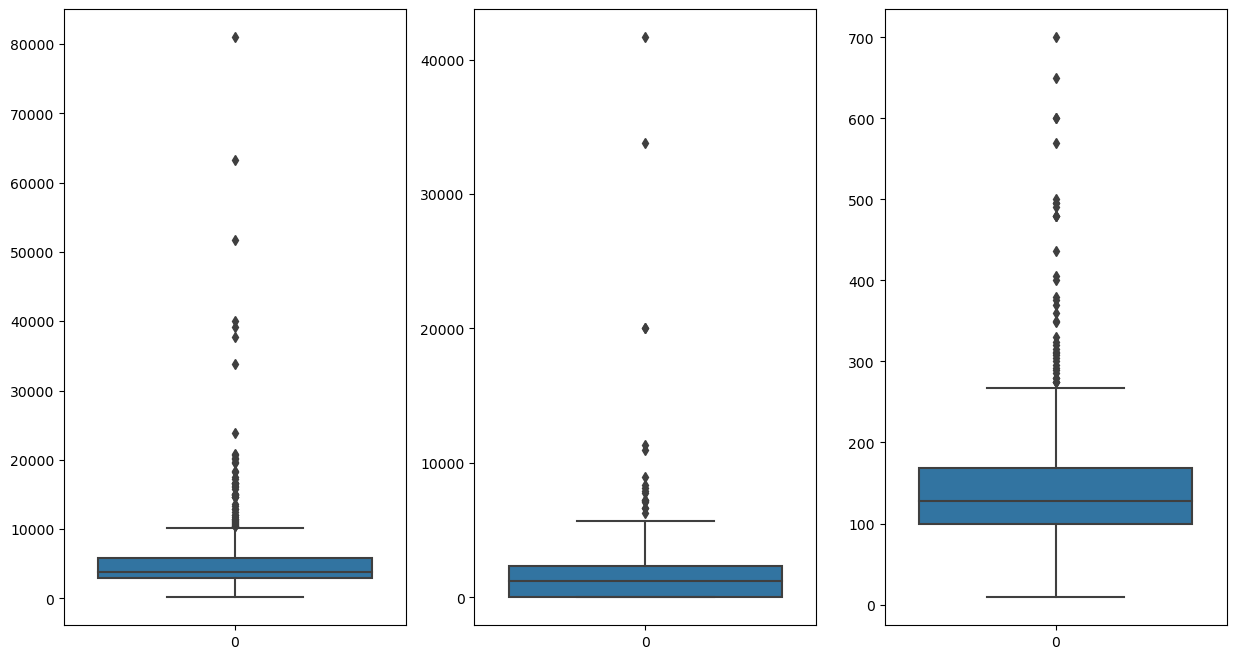

In [55]:
#lets visualize the outliers using the Box Plot
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.show()

for descrete variables

In [56]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


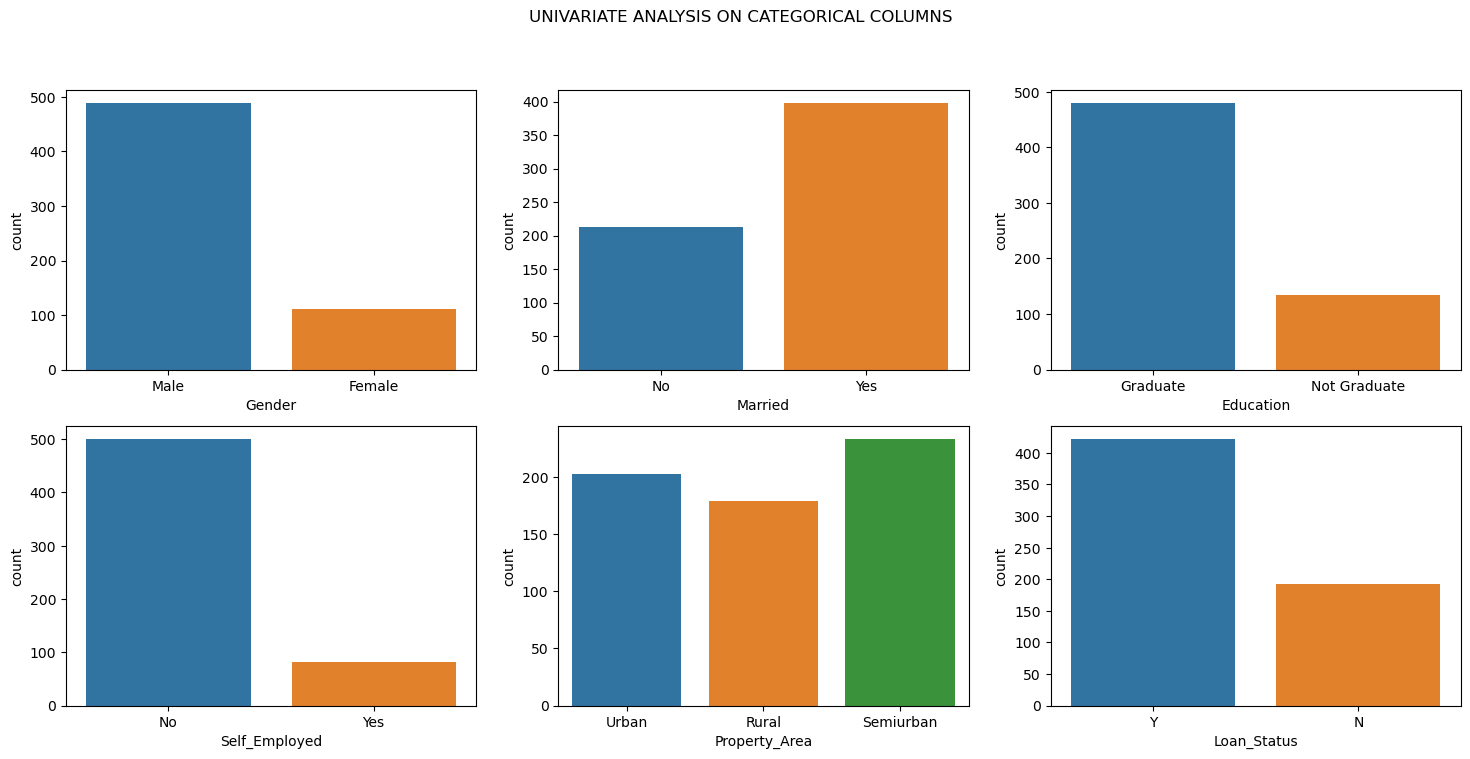

In [57]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,3,1)
sns.countplot(data=data,x='Gender')

plt.subplot(2,3,2)
sns.countplot(data=data,x='Married')

plt.subplot(2,3,3)
sns.countplot(data=data,x='Education')

plt.subplot(2,3,4)
sns.countplot(data=data,x='Self_Employed')

plt.subplot(2,3,5)
sns.countplot(data=data,x='Property_Area')

plt.subplot(2,3,6)
sns.countplot(data=data,x='Loan_Status')

plt.suptitle('UNIVARIATE ANALYSIS ON CATEGORICAL COLUMNS')
plt.show()

# Data Preparation

In [58]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [59]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0


In [60]:
data['Dependents']=data['Dependents'].replace({'3+':3})

In [61]:
#checking missing values
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [62]:
#checking the percentage of missing values
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [63]:
data=data.dropna(subset=['Dependents','Education','LoanAmount','Loan_Amount_Term','Credit_History'])

In [64]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [65]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

##outliers treatment

In [66]:
#Encoding
data['Gender']=data['Gender'].map({'Male':1,"Female":0}).astype('int')
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,"No":0}).astype('int')
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Urban':2,'Semiurban':1}).astype('int')
data['Credit_History']=data['Credit_History'].map({'good':1,'bad':0}).astype('int')
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [67]:
data['Dependents'].unique()

array(['1', '0', '2', 3], dtype=object)

In [68]:
data['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [69]:
#Data Type Conversion
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')

Transformations

In [70]:
data[['Income','LoanAmount']].skew()  #>1 so its positive skewness,Lets apply BOXCOX transformation to remove skewness

Income        5.721650
LoanAmount    2.584748
dtype: float64

In [71]:
#BOXCON transformation
from scipy.stats import boxcox
data['Income'],a=boxcox(data['Income'])
data['LoanAmount'],c=boxcox(data['LoanAmount'])

In [72]:
data[['Income','LoanAmount']].skew()

Income       -0.026445
LoanAmount    0.037265
dtype: float64

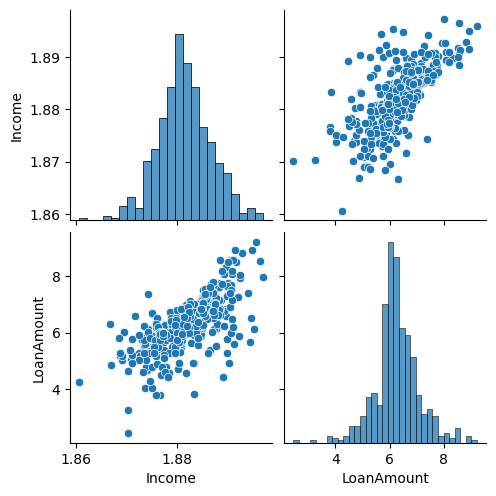

In [73]:
sns.pairplot(data[['Income','LoanAmount']])

_------------------------------------

In [74]:
#input and output
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Train = []
Test = []
CV = []

for i in range(1, 101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the Logistic Regression model
    log_default = LogisticRegression()
    log_default.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    y_pred_train = log_default.predict(X_train)
    y_pred_test = log_default.predict(X_test)
    
    # Calculate accuracy scores and append to respective lists
    Train.append(accuracy_score(y_train, y_pred_train))
    Test.append(accuracy_score(y_test, y_pred_test))
    
    # Perform cross-validation and append scores to the CV list
    cv_scores = cross_val_score(log_default, X_train, y_train, cv=5, scoring='accuracy')
    CV.append(cv_scores)

# Create a DataFrame to store scores
scores_df = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})

# Filter rows where the difference between train, test, and cross-validation scores is within a certain threshold
threshold = 0.05
filtered_scores = scores_df[(abs(scores_df['Train'] - scores_df['Test']) <= threshold) & 
                            (abs(scores_df['Test'] - scores_df['CV'].apply(lambda x: x.mean())) <= threshold)]

# Find the random state with the maximum cross-validation score
best_rs = filtered_scores['CV'].apply(lambda x: x.mean()).idxmax()

print("Best random state is:", best_rs)


Best random state is: 16


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Train = []
Test = []
CV = []

for i in range(1, 101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the Logistic Regression model
    log_default = LogisticRegression()
    log_default.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    y_pred_train = log_default.predict(X_train)
    y_pred_test = log_default.predict(X_test)
    
    # Calculate accuracy scores and append to respective lists
    Train.append(accuracy_score(y_train, y_pred_train))
    Test.append(accuracy_score(y_test, y_pred_test))
    
    # Perform cross-validation and append scores to the CV list
    cv_scores = cross_val_score(log_default, X_train, y_train, cv=5, scoring='accuracy')
    CV.append(cv_scores.mean())  # Calculating the mean of cross-validation scores

# Create a DataFrame to store scores
scores_df = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})

# Filter rows where the difference between train, test, and cross-validation scores is within a certain threshold
threshold = 0.05
filtered_scores = scores_df[(abs(scores_df['Train'] - scores_df['Test']) <= threshold) & 
                            (abs(scores_df['Test'] - scores_df['CV']) <= threshold)]

# Find the random state with the maximum cross-validation score
best_rs = filtered_scores['CV'].idxmax()

print("Best random state is:", best_rs)


Best random state is: 16


In [80]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

Machine Learning Modeling & Evaluation

# 1.Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train=log_model.predict(X_train)
ypred_test=log_model.predict(X_test)

print("Train accuracy : ",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').max())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy :  0.801452784503632
cross validation score : 0.8292682926829268
Test Accuracy : 0.8461538461538461


# 2.KNN 

In [82]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model=knn_grid.best_estimator_

ypred_train=knn_model.predict(X_train)
ypred_test=knn_model.predict(X_test)

print("Train accuracy : ",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').max())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy :  0.7627118644067796
cross validation score : 0.8292682926829268
Test Accuracy : 0.7403846153846154


# 3.Support Vector Machine (SVM)